## *Setup*

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import csv
from config import gkey
from scipy.stats import linregress

In [2]:
# Import of Census data and creation of a dataframe

census_data = "../project_one/census_income_data.csv"

census_data_income = pd.read_csv(census_data)
census_data_income.head()

,Table with column headers in rows 3 and 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2018 Poverty and Median Household Income Estim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Information,NaN,NaN,NaN,All Ages,NaN,NaN,NaN,NaN,NaN,...,NaN,Median Household Income,NaN,NaN,Age 0-4,NaN,NaN,NaN,NaN,NaN
2,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,000,US,United States,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,...,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
4,01,000,AL,Alabama,"801,758","785,668","817,848",16.8,16.5,17.1,...,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4


In [3]:
# Verification of request success of EPA API data
    
url = "https://enviro.epa.gov/enviro/efservice/SDW_VIOL_ENFORCEMENT/CSV"

response = requests.get(url).json
print(response)

<bound method Response.json of <Response [200]>>


In [4]:
# Request of EPA data from API CSV data and conversion to data frame

CSV_URL = "https://enviro.epa.gov/enviro/efservice/SDW_VIOL_ENFORCEMENT/CSV" 

#requesting csv from epa website decoding/reading as csv then converting to a list    
with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    
# Converting to dataframe    
epa_csv = pd.DataFrame(my_list)
epa_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,SDW_VIOL_ENFORCEMENT.PWSID,SDW_VIOL_ENFORCEMENT.PWSNAME,SDW_VIOL_ENFORCEMENT.STATE,SDW_VIOL_ENFORCEMENT.COUNTYSERVED,SDW_VIOL_ENFORCEMENT.VIOID,SDW_VIOL_ENFORCEMENT.CCODE,SDW_VIOL_ENFORCEMENT.CNAME,SDW_VIOL_ENFORCEMENT.CTYPE,SDW_VIOL_ENFORCEMENT.VCODE,SDW_VIOL_ENFORCEMENT.VNAME,...,SDW_VIOL_ENFORCEMENT.VIOLMEASURE,SDW_VIOL_ENFORCEMENT.ENFACTIONTYPE,SDW_VIOL_ENFORCEMENT.ENFACTIONNAME,SDW_VIOL_ENFORCEMENT.ENFDATE,SDW_VIOL_ENFORCEMENT.COMPPERBEGINDATE,SDW_VIOL_ENFORCEMENT.COMPPERENDDATE,SDW_VIOL_ENFORCEMENT.SOURCES,SDW_VIOL_ENFORCEMENT.DEFINITION,SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS,
1,ID5160056,SPRINGDALE ACRES,ID,CASSIA,8251,2274,HEXACHLOROBENZENE,SOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SIF,St Public Notif received,18-JUN-14,01-JAN-11,31-DEC-13,Discharge from metal refineries and agricultur...,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...,None
2,IN2493152,"G & S REALTY PARTNERS, LLC.",IN,MARION,6030,2992,Ethylbenzene,VOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SIF,St Public Notif received,10-JUN-10,01-JAN-09,31-DEC-09,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems,None
3,PA2450314,FEDEX FREIGHT EAST,PA,MONROE,1016111,2992,Ethylbenzene,VOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SIA,St Violation/Reminder Notice,25-AUG-10,01-APR-10,30-JUN-10,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems,None
4,WY5601199,KENNINGTON SPRINGS PIPELINE,WY,,2325,2046,Carbofuran,SOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SOX,St Compliance achieved,24-OCT-11,01-JAN-08,31-DEC-10,Leaching of soil fumigant used on rice and alf...,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod...",None


## *Data Cleaning*

### Cleaning Census Data

In [5]:
# Rename Census data dataframe

census_try = census_data_income

In [6]:
# Removal of extraneaous rows

census_tryi=census_try.drop(census_try.index[0])
census_tryi.head()

,Table with column headers in rows 3 and 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
1,Geographic Information,NaN,NaN,NaN,All Ages,NaN,NaN,NaN,NaN,NaN,...,NaN,Median Household Income,NaN,NaN,Age 0-4,NaN,NaN,NaN,NaN,NaN
2,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,000,US,United States,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,...,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
4,01,000,AL,Alabama,"801,758","785,668","817,848",16.8,16.5,17.1,...,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4
5,01,001,AL,Autauga County,"7,587","6,334","8,840",13.8,11.5,16.1,...,23.9,"59,338","53,628","65,048",.,.,.,.,.,.


In [7]:
# Removal of extraneaous rows

census_tryin=census_tryi.drop(census_tryi.index[0])
census_tryin.head()

,Table with column headers in rows 3 and 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,000,US,United States,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,...,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
4,01,000,AL,Alabama,"801,758","785,668","817,848",16.8,16.5,17.1,...,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4
5,01,001,AL,Autauga County,"7,587","6,334","8,840",13.8,11.5,16.1,...,23.9,"59,338","53,628","65,048",.,.,.,.,.,.
6,01,003,AL,Baldwin County,"21,069","17,390","24,748",9.8,8.1,11.5,...,16.9,"57,588","54,437","60,739",.,.,.,.,.,.


In [8]:
# Duplication of first row as the dataframe header

census_tryin.rename(columns=census_tryin.iloc[0],inplace=True)

census_tryin.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
2,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,000,US,United States,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,...,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
4,01,000,AL,Alabama,"801,758","785,668","817,848",16.8,16.5,17.1,...,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4
5,01,001,AL,Autauga County,"7,587","6,334","8,840",13.8,11.5,16.1,...,23.9,"59,338","53,628","65,048",.,.,.,.,.,.
6,01,003,AL,Baldwin County,"21,069","17,390","24,748",9.8,8.1,11.5,...,16.9,"57,588","54,437","60,739",.,.,.,.,.,.


In [9]:
# Removal of extraneaous rows

census_trying=census_tryin.drop(census_tryin.index[0])
census_trying.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
3,00,000,US,United States,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,...,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
4,01,000,AL,Alabama,"801,758","785,668","817,848",16.8,16.5,17.1,...,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4
5,01,001,AL,Autauga County,"7,587","6,334","8,840",13.8,11.5,16.1,...,23.9,"59,338","53,628","65,048",.,.,.,.,.,.
6,01,003,AL,Baldwin County,"21,069","17,390","24,748",9.8,8.1,11.5,...,16.9,"57,588","54,437","60,739",.,.,.,.,.,.
7,01,005,AL,Barbour County,"6,788","5,662","7,914",30.9,25.8,36.0,...,45.9,"34,382","31,157","37,607",.,.,.,.,.,.


In [10]:
# Reset Index

census_trying.reset_index(drop=True)

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
0,00,000,US,United States,"41,852,315","41,619,366","42,085,264",13.1,13.0,13.2,...,17.2,"61,937","61,843","62,031","3,758,704","3,714,862","3,802,546",19.5,19.3,19.7
1,01,000,AL,Alabama,"801,758","785,668","817,848",16.8,16.5,17.1,...,23.7,"49,881","49,123","50,639","73,915","69,990","77,840",26.0,24.6,27.4
2,01,001,AL,Autauga County,"7,587","6,334","8,840",13.8,11.5,16.1,...,23.9,"59,338","53,628","65,048",.,.,.,.,.,.
3,01,003,AL,Baldwin County,"21,069","17,390","24,748",9.8,8.1,11.5,...,16.9,"57,588","54,437","60,739",.,.,.,.,.,.
4,01,005,AL,Barbour County,"6,788","5,662","7,914",30.9,25.8,36.0,...,45.9,"34,382","31,157","37,607",.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,037,WY,Sweetwater County,"3,540","2,804","4,276",8.4,6.7,10.1,...,11.2,"73,315","67,141","79,489",.,.,.,.,.,.
3190,56,039,WY,Teton County,"1,443","1,137","1,749",6.3,5.0,7.6,...,7.7,"99,087","88,142","110,032",.,.,.,.,.,.
3191,56,041,WY,Uinta County,"2,010","1,585","2,435",10.0,7.9,12.1,...,14.0,"63,401","56,812","69,990",.,.,.,.,.,.
3192,56,043,WY,Washakie County,918,700,"1,136",11.9,9.1,14.7,...,19.3,"55,190","49,263","61,117",.,.,.,.,.,.


In [11]:
# Creation of new data frame with relevant columns

new_census = census_tryin[['Postal Code','Name', 'Median Household Income']]

In [12]:
# Identification of naming conventions outside of "County"

bad_census = new_census[new_census['Name'].str.contains("County")==False]
bad_census

,Postal Code,Name,Median Household Income
2,Postal Code,Name,Median Household Income
3,US,United States,"61,937"
4,AL,Alabama,"49,881"
72,AK,Alaska,"74,912"
73,AK,Aleutians East Borough,"70,081"
...,...,...,...
3003,VA,Winchester city,"51,456"
3004,WA,Washington,"74,023"
3044,WV,West Virginia,"44,038"
3100,WI,Wisconsin,"60,779"


In [13]:
# Displaying all rows in this dataframe 

# pd.set_option('display.max_rows', bad_census.shape[0]+1)
# bad_census

In [14]:
# Extracting rows with county-level data

clean_census = new_census[new_census['Name'].str.contains("County|city|Borough|Census|Parish|District")]
clean_census.head()

,Postal Code,Name,Median Household Income
5,AL,Autauga County,"59,338"
6,AL,Baldwin County,"57,588"
7,AL,Barbour County,"34,382"
8,AL,Bibb County,"46,064"
9,AL,Blount County,"50,412"


In [15]:
# Reformatting County data to match format of EPA data for merge

clean_census['Name2'] = clean_census['Name'].str.replace(' County', '')
clean_census['NameUp'] = clean_census['Name2'].str.upper()

clean_census.head()

<ipython-input-15-158bfa64753e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_census['Name2'] = clean_census['Name'].str.replace(' County', '')
<ipython-input-15-158bfa64753e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_census['NameUp'] = clean_census['Name2'].str.upper()


,Postal Code,Name,Median Household Income,Name2,NameUp
5,AL,Autauga County,"59,338",Autauga,AUTAUGA
6,AL,Baldwin County,"57,588",Baldwin,BALDWIN
7,AL,Barbour County,"34,382",Barbour,BARBOUR
8,AL,Bibb County,"46,064",Bibb,BIBB
9,AL,Blount County,"50,412",Blount,BLOUNT


In [16]:
# Removing and reordering extraneous columns

merge_census = clean_census[['Postal Code','NameUp','Median Household Income']]

merge_census.head()

,Postal Code,NameUp,Median Household Income
5,AL,AUTAUGA,"59,338"
6,AL,BALDWIN,"57,588"
7,AL,BARBOUR,"34,382"
8,AL,BIBB,"46,064"
9,AL,BLOUNT,"50,412"


In [17]:
# Reset Index

merge_census.reset_index(drop=True)

,Postal Code,NameUp,Median Household Income
0,AL,AUTAUGA,"59,338"
1,AL,BALDWIN,"57,588"
2,AL,BARBOUR,"34,382"
3,AL,BIBB,"46,064"
4,AL,BLOUNT,"50,412"
...,...,...,...
3136,WY,SWEETWATER,"73,315"
3137,WY,TETON,"99,087"
3138,WY,UINTA,"63,401"
3139,WY,WASHAKIE,"55,190"


### Cleaning EPA Data 

In [18]:
# Renaming EPA dataframe
epa_try =  epa_csv

In [19]:
# Duplication of first row as the dataframe header

epa_try.rename(columns=epa_try.iloc[0],inplace=True)

epa_try.head()

,SDW_VIOL_ENFORCEMENT.PWSID,SDW_VIOL_ENFORCEMENT.PWSNAME,SDW_VIOL_ENFORCEMENT.STATE,SDW_VIOL_ENFORCEMENT.COUNTYSERVED,SDW_VIOL_ENFORCEMENT.VIOID,SDW_VIOL_ENFORCEMENT.CCODE,SDW_VIOL_ENFORCEMENT.CNAME,SDW_VIOL_ENFORCEMENT.CTYPE,SDW_VIOL_ENFORCEMENT.VCODE,SDW_VIOL_ENFORCEMENT.VNAME,...,SDW_VIOL_ENFORCEMENT.VIOLMEASURE,SDW_VIOL_ENFORCEMENT.ENFACTIONTYPE,SDW_VIOL_ENFORCEMENT.ENFACTIONNAME,SDW_VIOL_ENFORCEMENT.ENFDATE,SDW_VIOL_ENFORCEMENT.COMPPERBEGINDATE,SDW_VIOL_ENFORCEMENT.COMPPERENDDATE,SDW_VIOL_ENFORCEMENT.SOURCES,SDW_VIOL_ENFORCEMENT.DEFINITION,SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS,
0,SDW_VIOL_ENFORCEMENT.PWSID,SDW_VIOL_ENFORCEMENT.PWSNAME,SDW_VIOL_ENFORCEMENT.STATE,SDW_VIOL_ENFORCEMENT.COUNTYSERVED,SDW_VIOL_ENFORCEMENT.VIOID,SDW_VIOL_ENFORCEMENT.CCODE,SDW_VIOL_ENFORCEMENT.CNAME,SDW_VIOL_ENFORCEMENT.CTYPE,SDW_VIOL_ENFORCEMENT.VCODE,SDW_VIOL_ENFORCEMENT.VNAME,...,SDW_VIOL_ENFORCEMENT.VIOLMEASURE,SDW_VIOL_ENFORCEMENT.ENFACTIONTYPE,SDW_VIOL_ENFORCEMENT.ENFACTIONNAME,SDW_VIOL_ENFORCEMENT.ENFDATE,SDW_VIOL_ENFORCEMENT.COMPPERBEGINDATE,SDW_VIOL_ENFORCEMENT.COMPPERENDDATE,SDW_VIOL_ENFORCEMENT.SOURCES,SDW_VIOL_ENFORCEMENT.DEFINITION,SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS,
1,ID5160056,SPRINGDALE ACRES,ID,CASSIA,8251,2274,HEXACHLOROBENZENE,SOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SIF,St Public Notif received,18-JUN-14,01-JAN-11,31-DEC-13,Discharge from metal refineries and agricultur...,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...,None
2,IN2493152,"G & S REALTY PARTNERS, LLC.",IN,MARION,6030,2992,Ethylbenzene,VOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SIF,St Public Notif received,10-JUN-10,01-JAN-09,31-DEC-09,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems,None
3,PA2450314,FEDEX FREIGHT EAST,PA,MONROE,1016111,2992,Ethylbenzene,VOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SIA,St Violation/Reminder Notice,25-AUG-10,01-APR-10,30-JUN-10,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems,None
4,WY5601199,KENNINGTON SPRINGS PIPELINE,WY,,2325,2046,Carbofuran,SOC,03,"Monitoring, Regular",...,Monitoring and Reporting,SOX,St Compliance achieved,24-OCT-11,01-JAN-08,31-DEC-10,Leaching of soil fumigant used on rice and alf...,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod...",None


In [20]:
# Displaying EPA Data Columns for Reference

epa_try.columns

Index(['SDW_VIOL_ENFORCEMENT.PWSID', 'SDW_VIOL_ENFORCEMENT.PWSNAME',
       'SDW_VIOL_ENFORCEMENT.STATE', 'SDW_VIOL_ENFORCEMENT.COUNTYSERVED',
       'SDW_VIOL_ENFORCEMENT.VIOID', 'SDW_VIOL_ENFORCEMENT.CCODE',
       'SDW_VIOL_ENFORCEMENT.CNAME', 'SDW_VIOL_ENFORCEMENT.CTYPE',
       'SDW_VIOL_ENFORCEMENT.VCODE', 'SDW_VIOL_ENFORCEMENT.VNAME',
       'SDW_VIOL_ENFORCEMENT.VTYPE', 'SDW_VIOL_ENFORCEMENT.VIOLMEASURE',
       'SDW_VIOL_ENFORCEMENT.ENFACTIONTYPE',
       'SDW_VIOL_ENFORCEMENT.ENFACTIONNAME', 'SDW_VIOL_ENFORCEMENT.ENFDATE',
       'SDW_VIOL_ENFORCEMENT.COMPPERBEGINDATE',
       'SDW_VIOL_ENFORCEMENT.COMPPERENDDATE', 'SDW_VIOL_ENFORCEMENT.SOURCES',
       'SDW_VIOL_ENFORCEMENT.DEFINITION',
       'SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS', ''],
      dtype='object')

In [21]:
# Selection of pertinent columns

epa_data_info = epa_try[["SDW_VIOL_ENFORCEMENT.STATE", 
                         "SDW_VIOL_ENFORCEMENT.COUNTYSERVED", 
                         "SDW_VIOL_ENFORCEMENT.CNAME", 
                         "SDW_VIOL_ENFORCEMENT.SOURCES", 
                         "SDW_VIOL_ENFORCEMENT.DEFINITION", 
                         "SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS"]]

epa_data_info.head()

,SDW_VIOL_ENFORCEMENT.STATE,SDW_VIOL_ENFORCEMENT.COUNTYSERVED,SDW_VIOL_ENFORCEMENT.CNAME,SDW_VIOL_ENFORCEMENT.SOURCES,SDW_VIOL_ENFORCEMENT.DEFINITION,SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS
0,SDW_VIOL_ENFORCEMENT.STATE,SDW_VIOL_ENFORCEMENT.COUNTYSERVED,SDW_VIOL_ENFORCEMENT.CNAME,SDW_VIOL_ENFORCEMENT.SOURCES,SDW_VIOL_ENFORCEMENT.DEFINITION,SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS
1,ID,CASSIA,HEXACHLOROBENZENE,Discharge from metal refineries and agricultur...,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
2,IN,MARION,Ethylbenzene,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,PA,MONROE,Ethylbenzene,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
4,WY,,Carbofuran,Leaching of soil fumigant used on rice and alf...,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."


In [22]:
# Removal of extraneous rows

epa_data_info = epa_data_info.drop(epa_data_info.index[0])
epa_data_info.head()

,SDW_VIOL_ENFORCEMENT.STATE,SDW_VIOL_ENFORCEMENT.COUNTYSERVED,SDW_VIOL_ENFORCEMENT.CNAME,SDW_VIOL_ENFORCEMENT.SOURCES,SDW_VIOL_ENFORCEMENT.DEFINITION,SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS
1,ID,CASSIA,HEXACHLOROBENZENE,Discharge from metal refineries and agricultur...,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
2,IN,MARION,Ethylbenzene,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,PA,MONROE,Ethylbenzene,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
4,WY,,Carbofuran,Leaching of soil fumigant used on rice and alf...,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
5,IN,WAYNE,Carbofuran,Leaching of soil fumigant used on rice and alf...,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."


In [23]:
# Renaming of Columns

epa_data_clean = epa_data_info.rename(columns={"SDW_VIOL_ENFORCEMENT.STATE": "State",
                              "SDW_VIOL_ENFORCEMENT.COUNTYSERVED": "County",
                               "SDW_VIOL_ENFORCEMENT.SOURCES": "Violation Source",
                              "SDW_VIOL_ENFORCEMENT.CNAME": "Chemical Name",
                              "SDW_VIOL_ENFORCEMENT.DEFINITION": "Chemical Definition",
                               "SDW_VIOL_ENFORCEMENT.HEALTH_EFFECTS": "Health Effects"})
epa_data_clean.head()

,State,County,Chemical Name,Violation Source,Chemical Definition,Health Effects
1,ID,CASSIA,HEXACHLOROBENZENE,Discharge from metal refineries and agricultur...,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
2,IN,MARION,Ethylbenzene,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,PA,MONROE,Ethylbenzene,Discharge from petroleum refineries,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
4,WY,,Carbofuran,Leaching of soil fumigant used on rice and alf...,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
5,IN,WAYNE,Carbofuran,Leaching of soil fumigant used on rice and alf...,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."


In [24]:
# Reordering of Columns

epa_data_clean2 = epa_data_clean[['State', 'County', 'Violation Source', 'Chemical Name', 'Chemical Definition', 'Health Effects']]

epa_data_clean2.head()

,State,County,Violation Source,Chemical Name,Chemical Definition,Health Effects
1,ID,CASSIA,Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
2,IN,MARION,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,PA,MONROE,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
4,WY,,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
5,IN,WAYNE,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."


In [25]:
# Deletion of rows without county name

epa_data_clean3 = epa_data_clean2[epa_data_clean2.County != ""]

epa_data_clean3.head()

,State,County,Violation Source,Chemical Name,Chemical Definition,Health Effects
1,ID,CASSIA,Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
2,IN,MARION,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,PA,MONROE,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
5,IN,WAYNE,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
6,MT,FLATHEAD,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."


In [26]:
# Reset Index

epa_data_clean3.reset_index(drop=True)

,State,County,Violation Source,Chemical Name,Chemical Definition,Health Effects
0,ID,CASSIA,Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
1,IN,MARION,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
2,PA,MONROE,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,IN,WAYNE,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
4,MT,FLATHEAD,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
...,...,...,...,...,...,...
70170,WV,WYOMING,Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70171,NC,CASWELL,Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70172,PA,SCHUYLKILL,Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70173,VA,CULPEPER,Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...


In [27]:
# Mergring dataframes based on State and County

epa_census = pd.merge(epa_data_clean3,merge_census, how='left', left_on=['State','County'], right_on = ['Postal Code','NameUp'])

epa_census.head()

,State,County,Violation Source,Chemical Name,Chemical Definition,Health Effects,Postal Code,NameUp,Median Household Income
0,ID,CASSIA,Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...,ID,CASSIA,"51,804"
1,IN,MARION,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems,IN,MARION,"48,409"
2,PA,MONROE,Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems,PA,MONROE,"63,318"
3,IN,WAYNE,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod...",IN,WAYNE,"45,130"
4,MT,FLATHEAD,Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod...",MT,FLATHEAD,"54,382"


In [28]:
# Reording and selection of pertinent columns

epa_census_df = epa_census[["State",
                            "County",
                            "Median Household Income",
                            "Violation Source",
                            "Chemical Name",
                            "Chemical Definition",
                            "Health Effects"]]

epa_census_df.head()

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
0,ID,CASSIA,"51,804",Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
1,IN,MARION,"48,409",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
2,PA,MONROE,"63,318",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,IN,WAYNE,"45,130",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
4,MT,FLATHEAD,"54,382",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."


## *Data Analysis*

In [29]:
#Top five chemicals 

chems = epa_census_df["Chemical Name"]
chems

#Deciding how to count the chemicals 

0        HEXACHLOROBENZENE
1             Ethylbenzene
2             Ethylbenzene
3               Carbofuran
4               Carbofuran
               ...        
70171              Benzene
70172              Benzene
70173              Benzene
70174              Benzene
70175              Benzene
Name: Chemical Name, Length: 70176, dtype: object

In [30]:
topfive_chem = epa_census_df["Chemical Name"].value_counts()
topfive_chem

Chlorine                       5009
Radium-228                     4775
Arsenic                        4450
Trichloroethylene              3947
1,2,4-Trichlorobenzene         3944
1,2-Dichloropropane            3871
Ethylbenzene                   3781
o-Dichlorobenzene              3272
Tetrachloroethylene            3236
Vinyl chloride                 3196
Di(2-ethylhexyl) phthalate     2409
Heptachlor epoxide             2379
Heptachlor                     2291
Chlordane                      2272
Carbofuran                     2250
Pentachlorophenol              2138
HEXACHLOROBENZENE              2105
Toxaphene                      1840
ETHYLENE DIBROMIDE             1825
Endrin                         1764
Mercury                        1477
Antimony, Total                1278
Glyphosate                     1250
Endothall                      1223
Picloram                        983
Methoxychlor                    950
1,2-DIBROMO-3-CHLOROPROPANE     669
Benzene                     

In [31]:
#Choosing the top five
topfive_chems = pd.DataFrame(topfive_chem)
topfive_chemicals = topfive_chems.head(5)
topfive_chemicals

#This df shows that how many health violations for top five chemicals 

,Chemical Name
Chlorine,5009
Radium-228,4775
Arsenic,4450
Trichloroethylene,3947
"1,2,4-Trichlorobenzene",3944


In [32]:
#Getting the health effects of the top five 
c = epa_census_df.loc[((epa_census_df["Chemical Name"]=='Chlorine') | 
                       (epa_census_df['Chemical Name']=='Radium-228')|
                       (epa_census_df['Chemical Name']=='Arsenic')|
                       (epa_census_df['Chemical Name']=='Trichloroethylene')|
                       (epa_census_df['Chemical Name']=='1,2,4-Trichlorobenzene')
                      )]
c

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
45,CO,SUMMIT,"80,078",Discharge from textile finishing factories,"1,2,4-Trichlorobenzene","1,2,4-Trichlorobenzene is an aromatic, colorle...",Changes in adrenal glands
47,VT,RUTLAND,"51,723",Discharge from textile finishing factories,"1,2,4-Trichlorobenzene","1,2,4-Trichlorobenzene is an aromatic, colorle...",Changes in adrenal glands
49,PR,SALINAS MUNICIPIO,NaN,Discharge from textile finishing factories,"1,2,4-Trichlorobenzene","1,2,4-Trichlorobenzene is an aromatic, colorle...",Changes in adrenal glands
52,MT,FLATHEAD,"54,382",Discharge from textile finishing factories,"1,2,4-Trichlorobenzene","1,2,4-Trichlorobenzene is an aromatic, colorle...",Changes in adrenal glands
75,CT,NEW LONDON,"67,790",Discharge from textile finishing factories,"1,2,4-Trichlorobenzene","1,2,4-Trichlorobenzene is an aromatic, colorle...",Changes in adrenal glands
...,...,...,...,...,...,...,...
70155,MS,SUNFLOWER,"31,329",Erosion of natural deposits,Radium-228,A radionuclide is an atom with an unstable nuc...,Increased risk of cancer
70166,NV,DOUGLAS,"70,495",Erosion of natural deposits; runoff from orcha...,Arsenic,Arsenic is a semi-metal element in the periodi...,Skin damage or problems with circulatory syste...
70168,TX,IRION,"56,775",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
70169,CO,MORGAN,"55,387",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort


In [33]:
chem_health = c.groupby(["Chemical Name", "Health Effects"])
chem_health.size()

Chemical Name           Health Effects                                                                                 
1,2,4-Trichlorobenzene  Changes in adrenal glands                                                                          3944
Arsenic                 Skin damage or problems with circulatory systems, and may have increased risk of getting cancer    4450
Chlorine                Eye/nose irritation; stomach discomfort                                                            5009
Radium-228              Increased risk of cancer                                                                           4775
Trichloroethylene       Liver problems; increased risk of cancer                                                           3947
dtype: int64

In [34]:
topfive_chemicals['Health Effects']=['Eye/nose irritation; stomach discomfort',
                                     'Increased risk of cancer',
                                     'Skin damage or problems with circulatory systems, and may have increased risk of getting cancer',
                                     'Liver problems; increased risk of cancer',
                                     'Changes in adrenal glands'
                                    ] 
 

<ipython-input-34-dc8cdd059bb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topfive_chemicals['Health Effects']=['Eye/nose irritation; stomach discomfort',


In [35]:
topfive_chemicals

,Chemical Name,Health Effects
Chlorine,5009,Eye/nose irritation; stomach discomfort
Radium-228,4775,Increased risk of cancer
Arsenic,4450,Skin damage or problems with circulatory syste...
Trichloroethylene,3947,Liver problems; increased risk of cancer
"1,2,4-Trichlorobenzene",3944,Changes in adrenal glands


In [36]:
topfive_chemicals = topfive_chemicals.rename(columns={'Chemical Name':'Number of Violations'})
topfive_chemicals

,Number of Violations,Health Effects
Chlorine,5009,Eye/nose irritation; stomach discomfort
Radium-228,4775,Increased risk of cancer
Arsenic,4450,Skin damage or problems with circulatory syste...
Trichloroethylene,3947,Liver problems; increased risk of cancer
"1,2,4-Trichlorobenzene",3944,Changes in adrenal glands


In [37]:
# Analysis of data cleaning 
#
#The process of groupby method and value_counts method produced the dame results, but limits the use of all the data for ploting.

### Matplotlib Visualizations

In [38]:
# #Vis 1 - GeoHeat map of all the violations with number of violations as the heat fequency
    #Get Staes Lat/Lng the heat map with most violations 
## Vis 2 - GeoHeat map with top five chemicals violations as a marker layer/ counties with 
    #Maybe get the states with the most violations 

# a Describe data frame to get an overview of median income 

# Vis 3 - Bar graph of the median income of each county or state

    #Box plot of all median incomes w/outliers (rQ 2)
    #Scatter plot of counties with most violoations (rq 2)
    
# Vis 4 - Bar grpah of the top five chemcials vs. number of violations (rq 3)
    # How many counties have the violoatins of the top five chemicals 
    
# Vis 5 - Scatter plot of 

In [39]:
#Visualtion 1 Top five chemicals vs number of violations 

epa_census_df


,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
0,ID,CASSIA,"51,804",Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
1,IN,MARION,"48,409",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
2,PA,MONROE,"63,318",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,IN,WAYNE,"45,130",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
4,MT,FLATHEAD,"54,382",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
...,...,...,...,...,...,...,...
70171,WV,WYOMING,"35,460",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70172,NC,CASWELL,"45,517",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70173,PA,SCHUYLKILL,"48,809",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70174,VA,CULPEPER,"72,111",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...


In [40]:
graphs = epa_census_df

In [41]:
#Total number of chemicals 
chems_count = len(graphs["Chemical Name"].unique())
chems_count

35

In [42]:
chemical_violations = graphs['Chemical Name'].value_counts()
chem_try_df = pd.DataFrame(chemical_violations)
chem_try_df

,Chemical Name
Chlorine,5009
Radium-228,4775
Arsenic,4450
Trichloroethylene,3947
"1,2,4-Trichlorobenzene",3944
"1,2-Dichloropropane",3871
Ethylbenzene,3781
o-Dichlorobenzene,3272
Tetrachloroethylene,3236
Vinyl chloride,3196


In [43]:
chem_try_df = chem_try_df.rename(columns = {'Chemical Name':'Number of Violations'})

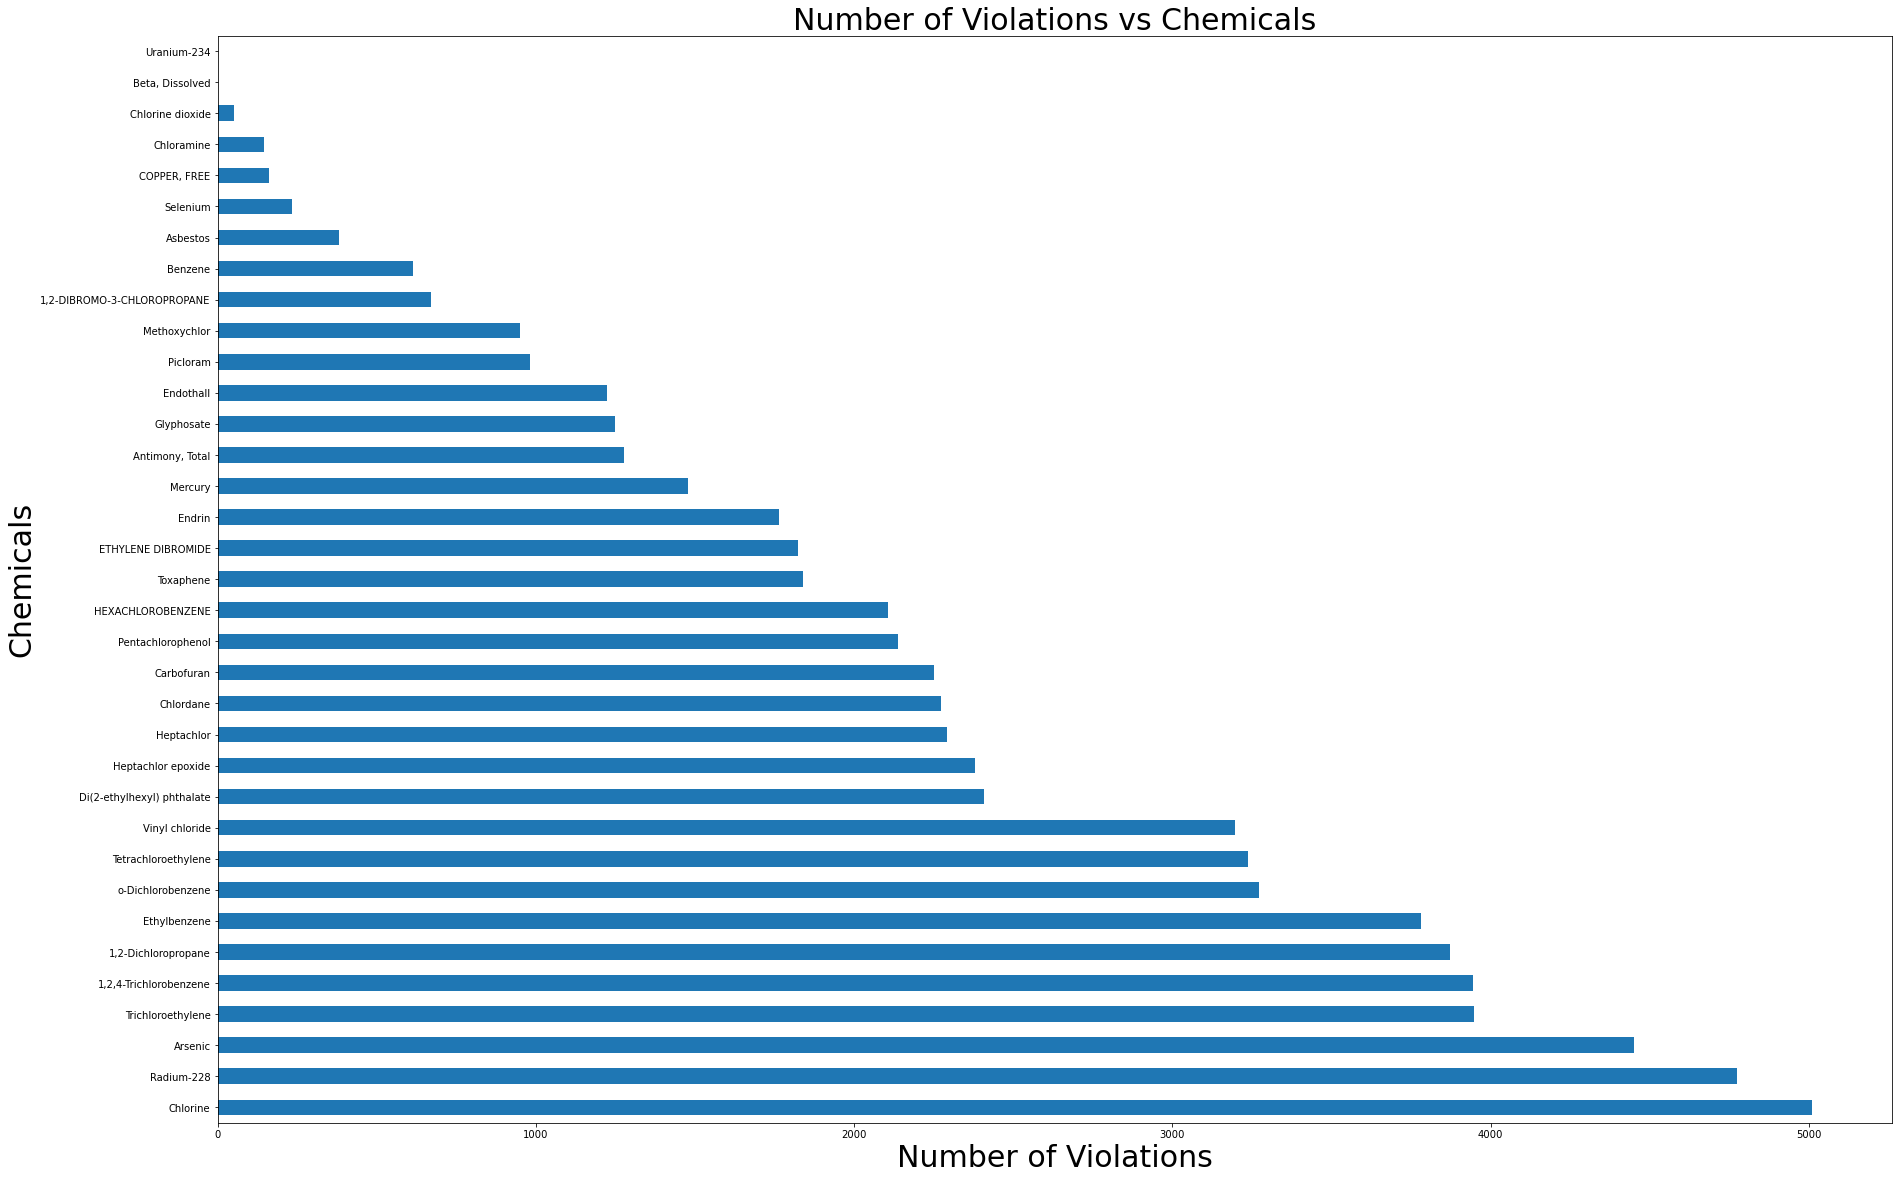

In [44]:
# Bar Graph Chemcials vs number of violations
ax = chem_try_df.plot.barh(y='Number of Violations', rot = 0, legend= False, figsize=(30,20))
plt.title("Number of Violations vs Chemicals",fontsize= 30)
ax.set_xlabel("Number of Violations",fontsize=30)
ax.set_ylabel("Chemicals",fontsize=30);

In [45]:
add_chem = chem_try_df['Number of Violations'].describe()
add_chem

count      35.000000
mean     2005.028571
std      1479.053523
min         1.000000
25%       809.500000
50%      1840.000000
75%      3216.000000
max      5009.000000
Name: Number of Violations, dtype: float64

In [46]:
epa_census_df

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
0,ID,CASSIA,"51,804",Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
1,IN,MARION,"48,409",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
2,PA,MONROE,"63,318",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,IN,WAYNE,"45,130",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
4,MT,FLATHEAD,"54,382",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
...,...,...,...,...,...,...,...
70171,WV,WYOMING,"35,460",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70172,NC,CASWELL,"45,517",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70173,PA,SCHUYLKILL,"48,809",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70174,VA,CULPEPER,"72,111",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...


In [47]:
health_group = epa_census_df.groupby("Health Effects")
health_group.count().head()

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition
Health Effects,,,,,,
Anemia; decrease in blood platelets; increased risk of cancer,615,615,582,615,615,615
Anemia; infants & young children: nervous system effects,52,52,48,52,52,52
Changes in adrenal glands,3944,3944,3770,3944,3944,3944
Eye/nose irritation; stomach discomfort,5009,5009,4806,5009,5009,5009
"Eye/nose irritation; stomach discomfort, anemia",146,146,137,146,146,146


In [48]:
health_facts = pd.DataFrame(health_group["State"].count())

health_facts.head()

,State
Health Effects,
Anemia; decrease in blood platelets; increased risk of cancer,615
Anemia; infants & young children: nervous system effects,52
Changes in adrenal glands,3944
Eye/nose irritation; stomach discomfort,5009
"Eye/nose irritation; stomach discomfort, anemia",146


In [49]:
health_facts = health_facts.reset_index()

health_facts

,Health Effects,State
0,Anemia; decrease in blood platelets; increased...,615
1,Anemia; infants & young children: nervous syst...,52
2,Changes in adrenal glands,3944
3,Eye/nose irritation; stomach discomfort,5009
4,"Eye/nose irritation; stomach discomfort, anemia",146
5,Hair or fingernail loss; numbness in fingers o...,233
6,Increase in blood cholesterol; decrease in blo...,1278
7,Increased risk of cancer,11844
8,"Increased risk of cancer, kidney toxicity",1
9,Increased risk of developing benign intestinal...,381


In [50]:
health_facts2 = health_facts.sort_values("State", ascending=False)

health_facts2

,Health Effects,State
7,Increased risk of cancer,11844
19,Liver problems; increased risk of cancer,7183
3,Eye/nose irritation; stomach discomfort,5009
13,Liver damage; increased risk of cancer,4670
27,Skin damage or problems with circulatory syste...,4450
2,Changes in adrenal glands,3944
16,Liver or kidneys problems,3781
20,"Liver, kidney, or circulatory system problems",3272
18,Liver problems,2747
25,Reproductive difficulties; liver problems; inc...,2409


In [108]:
health_facts3 = health_facts2.head(9)

health_facts_df = health_facts3.reset_index(drop=True)

health_facts_df = health_facts_df.rename(columns = {"State":"Number of Violations"})
health_facts_df

,Health Effects,Number of Violations
0,Increased risk of cancer,11844
1,Liver problems; increased risk of cancer,7183
2,Eye/nose irritation; stomach discomfort,5009
3,Liver damage; increased risk of cancer,4670
4,Skin damage or problems with circulatory syste...,4450
5,Changes in adrenal glands,3944
6,Liver or kidneys problems,3781
7,"Liver, kidney, or circulatory system problems",3272
8,Liver problems,2747


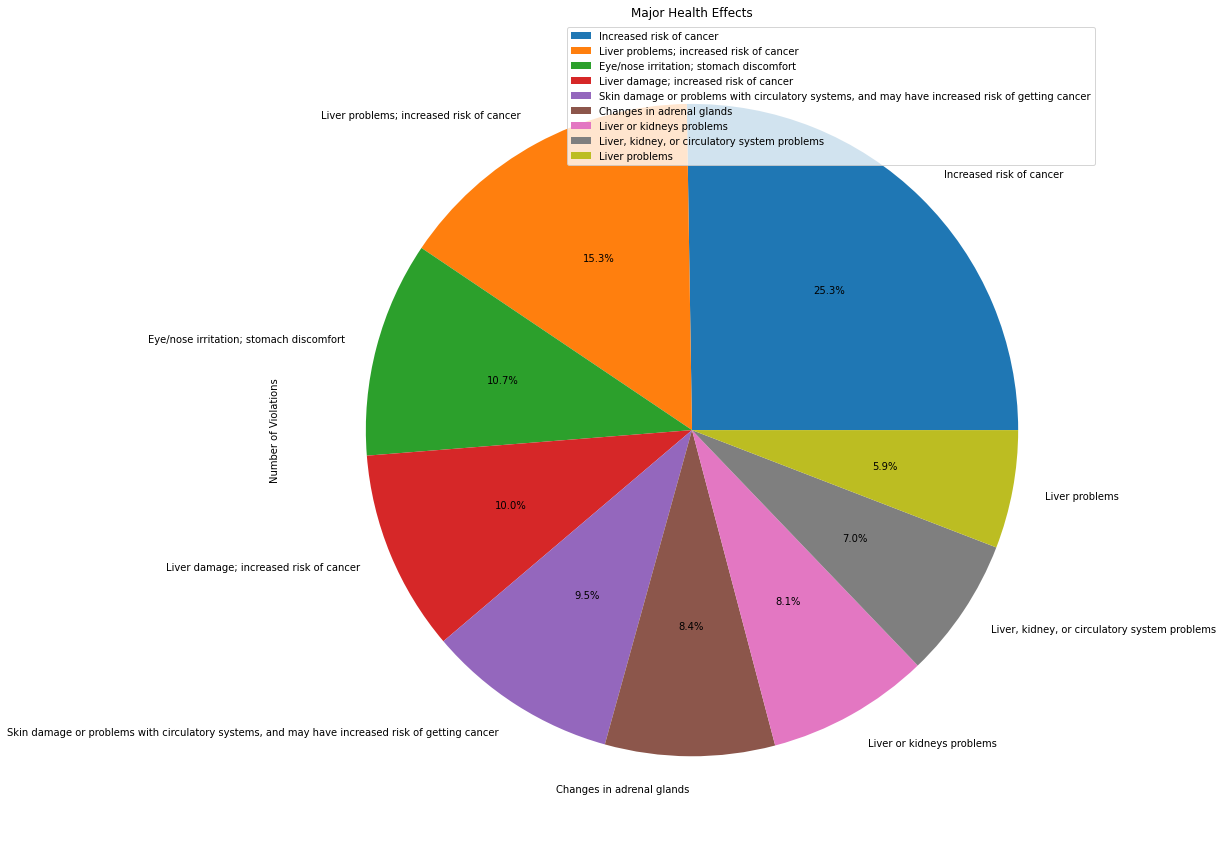

In [109]:
chemical_causes = [number for number in health_facts_df['Number of Violations']]
health_effects = [effect for effect in health_facts_df['Health Effects']]

df = pd.DataFrame({'Number of Violations': chemical_causes}, index=health_effects)
plot = df.plot.pie(y='Number of Violations', figsize=(15,15),autopct="%1.1f%%")
plt.title("Major Health Effects")
plt.show()

In [110]:
epa_census_df

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
0,ID,CASSIA,"51,804",Discharge from metal refineries and agricultur...,HEXACHLOROBENZENE,"Hexachlorobenzene, a synthetic organic chemica...",Liver or kidney problems; reproductive difficu...
1,IN,MARION,"48,409",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
2,PA,MONROE,"63,318",Discharge from petroleum refineries,Ethylbenzene,Ethylbenzene is a colorless organic liquid wit...,Liver or kidneys problems
3,IN,WAYNE,"45,130",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
4,MT,FLATHEAD,"54,382",Leaching of soil fumigant used on rice and alf...,Carbofuran,Carbofuran is a white crystalline solid with a...,"Problems with blood, nervous system, or reprod..."
...,...,...,...,...,...,...,...
70171,WV,WYOMING,"35,460",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70172,NC,CASWELL,"45,517",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70173,PA,SCHUYLKILL,"48,809",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...
70174,VA,CULPEPER,"72,111",Discharge from factories; leaching from gas st...,Benzene,"Benzene, a volatile organic chemical, is a cle...",Anemia; decrease in blood platelets; increased...


In [116]:
worst_chem = epa_census_df.loc[epa_census_df['Chemical Name']=='Chlorine']
worst_chem

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
17822,NC,GASTON,"52,798",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
17851,UT,CARBON,"51,394",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
17882,WV,BERKELEY,"59,619",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
17884,TX,SAN JACINTO,"47,028",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
17948,OK,MCCLAIN,"65,831",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
...,...,...,...,...,...,...,...
70139,TX,ORANGE,"56,556",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
70154,PA,DAUPHIN,"57,979",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
70168,TX,IRION,"56,775",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
70169,CO,MORGAN,"55,387",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort


In [124]:
md = worst_chem.loc[worst_chem['State']=='MD']
md

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
20054,MD,HARRIS,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
23518,MD,MONROE,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
26130,MD,PRINCE GEORGE'S,"82,445",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
34047,MD,BALTIMORE,"75,836",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
39359,MD,LUZERNE,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
51810,MD,SOMERSET,"42,098",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
59511,MD,LANCASTER,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
59866,MD,CARROLL,"95,956",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
63617,MD,SALEM,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
68755,MD,CHESTER,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort


In [125]:
fl = worst_chem.loc[worst_chem['State']=='FL']
fl

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
41406,FL,STERLING,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
62761,FL,BRAZOS,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort


In [126]:
co = worst_chem.loc[worst_chem['State']=='CO']
co

,State,County,Median Household Income,Violation Source,Chemical Name,Chemical Definition,Health Effects
18851,CO,PITKIN,"89,034",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
19608,CO,JEFFERSON,"85,550",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
20391,CO,CROWLEY,"35,880",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
20476,CO,EAGLE,"86,896",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
21122,CO,COMANCHE,NaN,Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
...,...,...,...,...,...,...,...
66631,CO,PUEBLO,"48,308",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
66912,CO,PITKIN,"89,034",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
68388,CO,CHAFFEE,"56,168",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort
68738,CO,EL PASO,"67,923",Water additive used to control microbes,Chlorine,The gaseous or liquid form of chlorine (CL2) i...,Eye/nose irritation; stomach discomfort


In [132]:
md_count = md['State'].count()
md_count



10

In [133]:
fl_count = fl['State'].count()
fl_count

2

In [134]:
co_count = co['State'].count()
co_count

132

In [140]:
# Put each state count of chlorine violations into a list 

cholorine_state = ['MD','FL','CO']
cholorine_state_count = [md_count,fl_count,co_count]

x_axis = np.arange(len(cholorine_state_count))

plot.bar(x='cholorine_state',y='cholorine_state_count', legend=True)
plt.title("Your state and Cholorine")



TypeError: can only concatenate str (not "numpy.int32") to str